Import knihoven


In [36]:
from ultralytics import YOLO
import numpy as np
import cv2 
import cvzone
import time
import matplotlib.pyplot as plt


Import souboru se jmeny 

In [37]:
model = YOLO('yolov8n.pt')  # load an official model
model = YOLO('best.pt')  # load a custom model

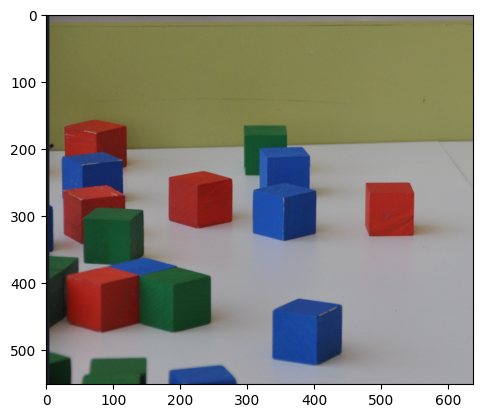

In [38]:
img = cv2.imread('obr10.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [39]:

results = model(img)
objects_ids = []#list pro uchovavani id nalezenych objektu 
objects_centers=[]#list pro uchovavani souradnic stredu nalezenych objektu
for r in results:
        boxes = r.boxes
        for box in boxes:
            cls = int(box.cls[0])#zjisti classu objektu
            print(cls) #vypise classu objektu jako id
            #bounding boxes
            x1,y1,x2,y2 = box.xyxy [0] #x1 je pozice leveho horniho rohu objektu v ose x, x2 je velikost objektu v ose x v px 
            x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)#prevedeni hodnot na int pro lepsi praci s nima 
            print('X=',x1,'Y=',y1,'W=',x2,'H=',y2)#vypisuje velikost objektu a jeho polohu v px
            if cls ==0:
                cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0),1)#nakresli box okolo detekovane veci 
            if cls ==1:
                cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),1)#nakresli box okolo detekovane veci 
            if cls ==2:
                cv2.rectangle(img,(x1,y1),(x2,y2),(0,0,255),1)#nakresli box okolo detekovane veci 
            #object center 
            center_x,center_y = x1+(x2/2),y1+(y2/2)#vypocet stredu objektu pro lepsi lokalizaci medveda 
            center_x,center_y = int(center_x-x1/2), int(center_y-y1/2)#prevede hodnoty na int aby se dali pouzit ve funkci ukazujici stred 
            center = center_x,center_y
            print('center:',center_x,center_y)#vypise udaje 
            cv2.circle(img, (center_x,center_y),2, (255,0,255), thickness=-1)
            #model confidence
            conf = box.conf[0]#jistota modelu 
            conf = float(conf*100)
            rounded_conf = int(conf)#zaokrouhli jistotu modelu na dve desetina mista 
            print('confidence:',rounded_conf)
            #box on bounding box s nazvem claasy a confidence modelu 
            #cvzone.putTextRect(img, f'{classNames[cls]}{rounded_conf}',(max(0,x1), max(35,y1)))#vykresli nazev classy objektu spolecne s confidence do videa 
            objects_centers.append(center)#zapisovani hodnot do listu
#cv2.line(img,(int(img_width/2),0),(int(img_width/2),img_height),(255,0,255),thickness=2 )#vykresli na video primku stredem videa 


0: 576x640 6 bluecubes, 6 green cubes, 5 red cubes, 582.0ms
Speed: 4.2ms preprocess, 582.0ms inference, 0.0ms postprocess per image at shape (1, 3, 576, 640)


2
X= 30 Y= 374 W= 139 H= 475
center: 84 424
confidence: 95
2
X= 182 Y= 232 W= 279 H= 319
center: 230 275
confidence: 95
0
X= 337 Y= 423 W= 441 H= 525
center: 389 474
confidence: 95
0
X= 307 Y= 249 W= 403 H= 339
center: 355 294
confidence: 95
1
X= 138 Y= 374 W= 246 H= 475
center: 192 424
confidence: 95
1
X= 294 Y= 165 W= 359 H= 241
center: 326 203
confidence: 95
2
X= 24 Y= 254 W= 118 H= 343
center: 71 298
confidence: 94
2
X= 474 Y= 250 W= 549 H= 331
center: 511 290
confidence: 94
2
X= 26 Y= 154 W= 120 H= 230
center: 73 192
confidence: 93
1
X= 55 Y= 287 W= 146 H= 381
center: 100 334
confidence: 93
1
X= 63 Y= 511 W= 149 H= 552
center: 106 531
confidence: 93
0
X= 317 Y= 196 W= 393 H= 261
center: 355 228
confidence: 93
1
X= 4 Y= 356 W= 48 H= 467
center: 26 411
confidence: 92
1
X= 3 Y= 502 W= 38 H= 552
center: 20 527
confidence: 90
0
X= 183 Y= 522 W= 285 H= 552
center: 234 537
confidence: 87
0
X= 22 Y= 204 W= 115 H= 270
center: 68 237
confidence: 81
0
X= 0 Y= 281 W= 11 H= 354
center: 5 317
c

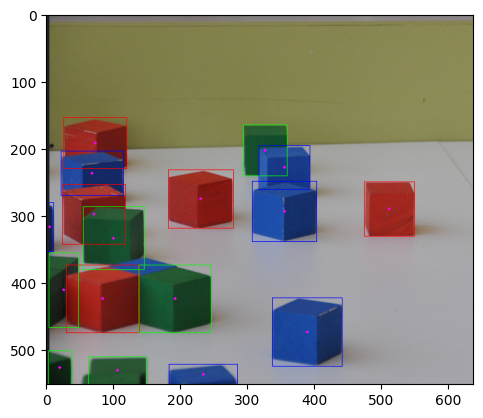

In [40]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))